In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
raw_path = "../data/processed/combined_raw_data.csv"
cleaned_path = "../data/processed/cleaned_data.csv"

df_raw = pd.read_csv(raw_path)
df_cleaned = pd.read_csv(cleaned_path)

print("Raw shape:", df_raw.shape)
print("Cleaned shape:", df_cleaned.shape)


Raw shape: (86675, 3)
Cleaned shape: (64236, 4)


In [3]:
def get_quality_metrics(df):
    return {
        "Total Rows": df.shape[0],
        "Total Columns": df.shape[1],
        "Missing Values": df.isnull().sum().sum(),
        "Duplicate Rows": df.duplicated().sum(),
        "Empty Text Rows": (df["text"].astype(str).str.strip() == "").sum(),
        "Invalid Labels": df[~df["label"].isin([0,1])].shape[0]
    }


In [4]:
raw_metrics = get_quality_metrics(df_raw)
cleaned_metrics = get_quality_metrics(df_cleaned)

quality_report = pd.DataFrame({
    "Metric": raw_metrics.keys(),
    "Before Cleaning": raw_metrics.values(),
    "After Cleaning": cleaned_metrics.values()
})

quality_report


,Metric,Before Cleaning,After Cleaning
0,Total Rows,86675,64236
1,Total Columns,3,4
2,Missing Values,19794,3
3,Duplicate Rows,3097,0
4,Empty Text Rows,0,0
5,Invalid Labels,18914,0


In [5]:
os.makedirs("../artifacts/reports", exist_ok=True)
quality_report.to_csv("../artifacts/reports/data_quality_comparison.csv", index=False)


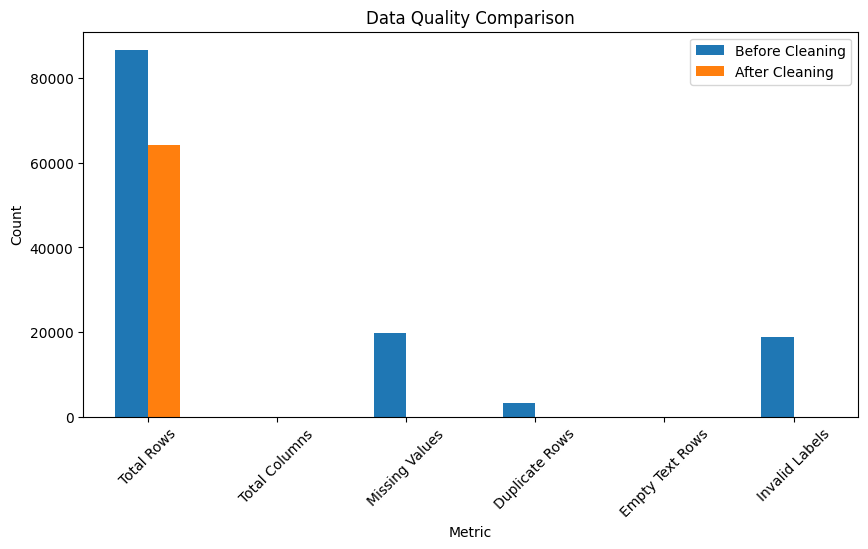

In [6]:
quality_report.set_index("Metric")[["Before Cleaning", "After Cleaning"]].plot(
    kind="bar",
    figsize=(10,5)
)
plt.title("Data Quality Comparison")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


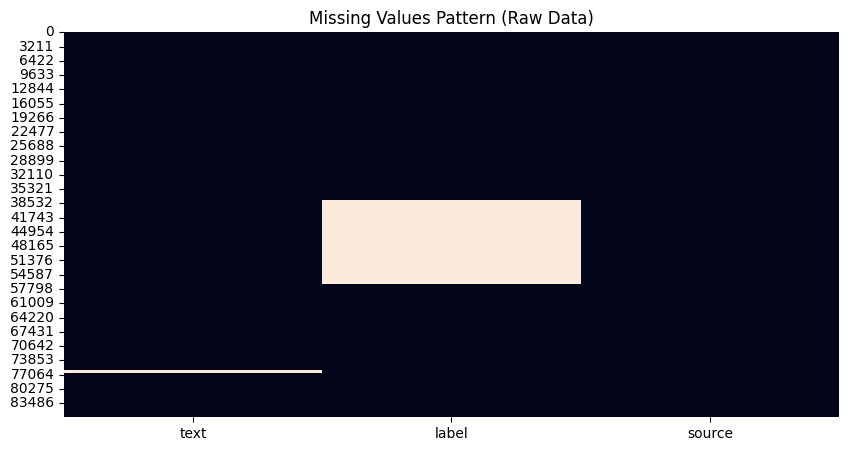

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df_raw.isnull(), cbar=False)
plt.title("Missing Values Pattern (Raw Data)")
plt.show()


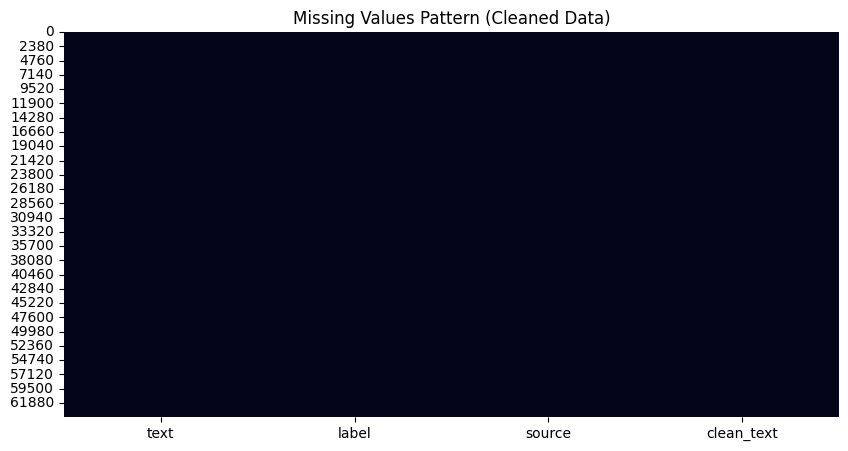

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(df_cleaned.isnull(), cbar=False)
plt.title("Missing Values Pattern (Cleaned Data)")
plt.show()


In [9]:
def completeness_score(df):
    return 1 - (df.isnull().sum().sum() / (df.shape[0] * df.shape[1]))

print("Completeness (Raw):", round(completeness_score(df_raw), 4))
print("Completeness (Cleaned):", round(completeness_score(df_cleaned), 4))


Completeness (Raw): 0.9239
Completeness (Cleaned): 1.0


In [10]:
print("Raw Label Values:", df_raw["label"].value_counts())
print("Cleaned Label Values:", df_cleaned["label"].value_counts())


Raw Label Values: label
1.0    55565
0.0    12196
Name: count, dtype: int64
Cleaned Label Values: label
1.0    52865
0.0    11371
Name: count, dtype: int64


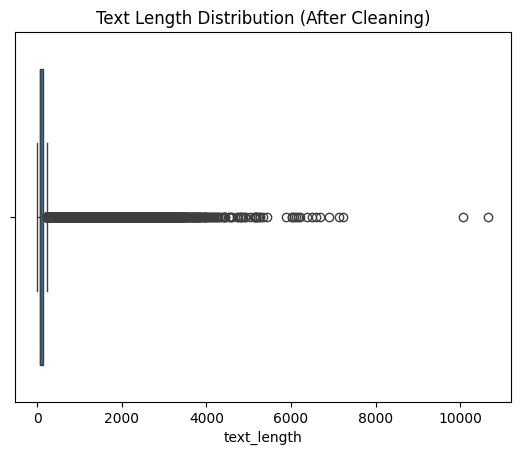

In [11]:
# Checking unusually short text
df_cleaned["text_length"] = df_cleaned["clean_text"].astype(str).apply(len)

sns.boxplot(x=df_cleaned["text_length"])
plt.title("Text Length Distribution (After Cleaning)")
plt.show()


In [12]:
html_path = "../artifacts/reports/data_quality_report.html"
quality_report.to_html(html_path, index=False)
print("Saved HTML report to:", html_path)


Saved HTML report to: ../artifacts/reports/data_quality_report.html


In [13]:
print("DATA QUALITY SUMMARY")
print("====================")
print(quality_report)


DATA QUALITY SUMMARY
            Metric  Before Cleaning  After Cleaning
0       Total Rows            86675           64236
1    Total Columns                3               4
2   Missing Values            19794               3
3   Duplicate Rows             3097               0
4  Empty Text Rows                0               0
5   Invalid Labels            18914               0
